In [1]:
#Time series analysis using pandas ( for detailed document refer word document in 'content' folder)
import pandas as pd
opsd_dailyN = pd.read_csv('https://raw.githubusercontent.com/ajaykuma/Datasets/master/opsd_germany_daily.txt', index_col=0, parse_dates=True)


In [2]:
opsd_dailyN

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


In [3]:
opsd_dailyN['Year'] = opsd_dailyN.index.year

In [5]:
opsd_dailyN['Month'] = opsd_dailyN.index.month


In [6]:
opsd_dailyN

,Consumption,Wind,Solar,Wind+Solar,Year,Month
Date,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,2006,1
2006-01-02,1380.52100,NaN,NaN,NaN,2006,1
2006-01-03,1442.53300,NaN,NaN,NaN,2006,1
2006-01-04,1457.21700,NaN,NaN,NaN,2006,1
2006-01-05,1477.13100,NaN,NaN,NaN,2006,1
...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12


In [7]:
opsd_dailyN.sample(5, random_state=0)

,Consumption,Wind,Solar,Wind+Solar,Year,Month
Date,,,,,,
2008-08-23,1152.011,NaN,NaN,NaN,2008,8
2013-08-08,1291.984,79.666,93.371,173.037,2013,8
2009-08-27,1281.057,NaN,NaN,NaN,2009,8
2015-10-02,1391.050,81.229,160.641,241.870,2015,10
2009-06-02,1201.522,NaN,NaN,NaN,2009,6


In [8]:
print(opsd_dailyN.loc['2017-08-10'])

Consumption    1351.491
Wind            100.274
Solar            71.160
Wind+Solar      171.434
Year           2017.000
Month             8.000
Name: 2017-08-10 00:00:00, dtype: float64


In [9]:
print(opsd_dailyN.loc['2014-01-20':'2014-01-22'])

            Consumption    Wind   Solar  Wind+Solar  Year  Month
Date                                                            
2014-01-20     1590.687  78.647   6.371      85.018  2014      1
2014-01-21     1624.806  15.643   5.835      21.478  2014      1
2014-01-22     1625.155  60.259  11.992      72.251  2014      1


In [10]:
print(opsd_dailyN.loc['2012-02'])

            Consumption     Wind   Solar  Wind+Solar  Year  Month
Date                                                             
2012-02-01     1511.866  199.607  43.502     243.109  2012      2
2012-02-02     1563.407   73.469  44.675     118.144  2012      2
2012-02-03     1563.631   36.352  46.510      82.862  2012      2
2012-02-04     1372.614   20.551  45.225      65.776  2012      2
2012-02-05     1279.432   55.522  54.572     110.094  2012      2
2012-02-06     1574.766   34.896  55.389      90.285  2012      2
2012-02-07     1615.078  100.312  19.867     120.179  2012      2
2012-02-08     1613.774   93.763  36.930     130.693  2012      2
2012-02-09     1591.532  132.219  19.042     151.261  2012      2
2012-02-10     1581.287   52.122  34.873      86.995  2012      2
2012-02-11     1377.404   32.375  44.629      77.004  2012      2
2012-02-12     1264.254   62.659  45.176     107.835  2012      2
2012-02-13     1561.987   25.984  11.287      37.271  2012      2
2012-02-14

In [11]:
import matplotlib.pyplot as plt
#using use seaborn styling for our plots
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

<AxesSubplot:xlabel='Date'>

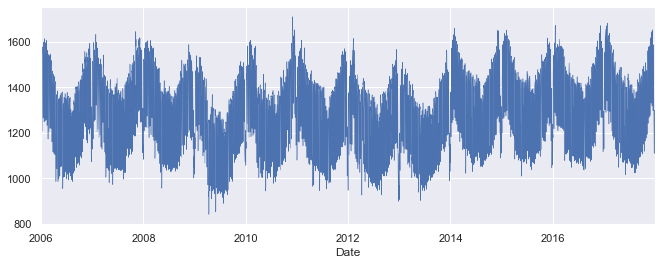

In [12]:
opsd_dailyN['Consumption'].plot(linewidth=0.5)

In [13]:
cols_plot = ['Consumption', 'Solar', 'Wind']

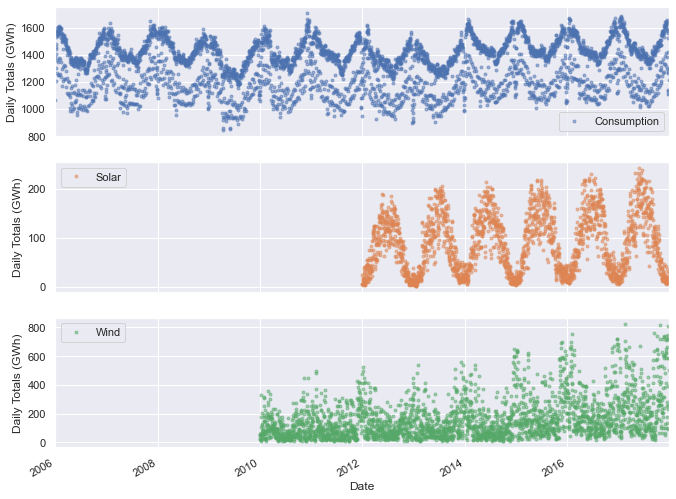

In [15]:
axes = opsd_dailyN[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

Text(0, 0.5, 'Daily Consumption (GWh)')

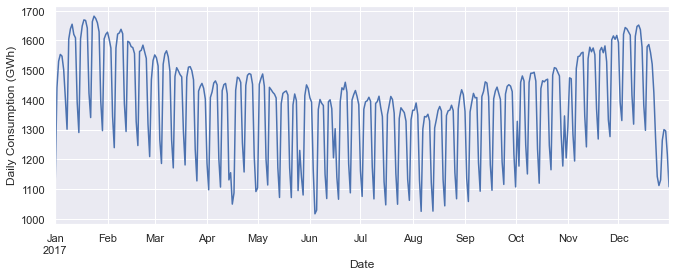

In [16]:
ax = opsd_dailyN.loc['2017', 'Consumption'].plot()
ax.set_ylabel('Daily Consumption (GWh)')

Text(0, 0.5, 'Daily Consumption (GWh)')

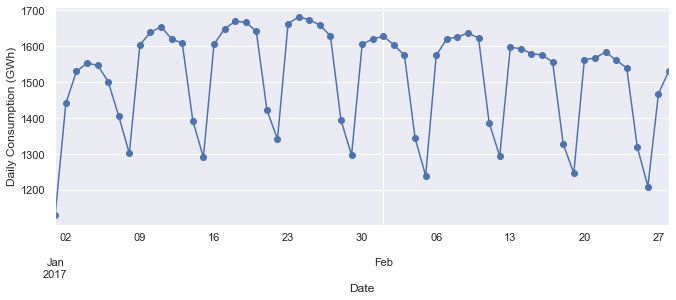

In [17]:
ax = opsd_dailyN.loc['2017-01':'2017-02', 'Consumption'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)')

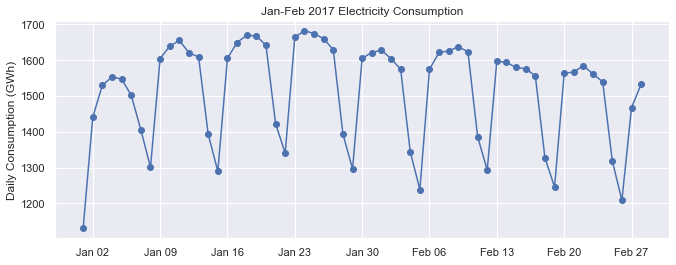

In [18]:
#to have vertical gridlines on a weekly time scale 
import matplotlib.dates as mdates
fig, ax = plt.subplots()
ax.plot(opsd_dailyN.loc['2017-01':'2017-02', 'Consumption'], marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)')
ax.set_title('Jan-Feb 2017 Electricity Consumption')
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

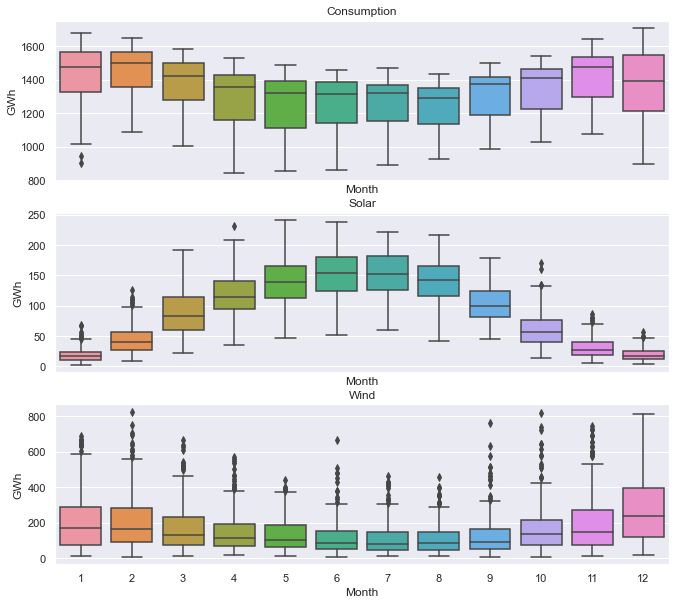

In [19]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
    sns.boxplot(data=opsd_dailyN, x='Month', y=name, ax=ax)
    ax.set_ylabel('GWh')
    ax.set_title(name)

In [21]:
import datetime

In [22]:
opsd_dailyN['Weekday Name'] = opsd_dailyN.index.weekday

In [23]:
opsd_dailyN

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,2006,1,6
2006-01-02,1380.52100,NaN,NaN,NaN,2006,1,0
2006-01-03,1442.53300,NaN,NaN,NaN,2006,1,1
2006-01-04,1457.21700,NaN,NaN,NaN,2006,1,2
2006-01-05,1477.13100,NaN,NaN,NaN,2006,1,3
...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,2
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,3
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,4


<AxesSubplot:xlabel='Weekday Name', ylabel='Consumption'>

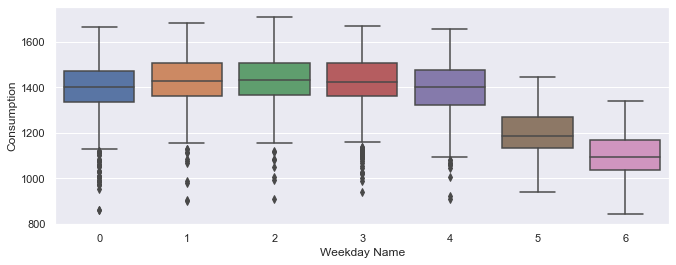

In [24]:
sns.boxplot(data=opsd_dailyN, x='Weekday Name', y='Consumption')

In [25]:
pd.date_range('1998-03-10', '1998-03-15', freq='D')

DatetimeIndex(['1998-03-10', '1998-03-11', '1998-03-12', '1998-03-13',
               '1998-03-14', '1998-03-15'],
              dtype='datetime64[ns]', freq='D')

In [26]:
pd.date_range('2004-09-20', periods=8, freq='H')

DatetimeIndex(['2004-09-20 00:00:00', '2004-09-20 01:00:00',
               '2004-09-20 02:00:00', '2004-09-20 03:00:00',
               '2004-09-20 04:00:00', '2004-09-20 05:00:00',
               '2004-09-20 06:00:00', '2004-09-20 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [27]:
times_sample = pd.to_datetime(['2013-02-03', '2013-02-06', '2013-02-08'])

In [28]:
consum_sample = opsd_dailyN.loc[times_sample, ['Consumption']].copy()

In [29]:
consum_sample

,Consumption
2013-02-03,1109.639
2013-02-06,1451.449
2013-02-08,1433.098


In [30]:
consum_freq = consum_sample.asfreq('D')

In [31]:
consum_freq

,Consumption
2013-02-03,1109.639
2013-02-04,NaN
2013-02-05,NaN
2013-02-06,1451.449
2013-02-07,NaN
2013-02-08,1433.098


In [32]:
consum_freq['Consumption - Forward Fill'] = consum_sample.asfreq('D', method='ffill')

In [33]:
consum_freq

,Consumption,Consumption - Forward Fill
2013-02-03,1109.639,1109.639
2013-02-04,NaN,1109.639
2013-02-05,NaN,1109.639
2013-02-06,1451.449,1451.449
2013-02-07,NaN,1451.449
2013-02-08,1433.098,1433.098


In [34]:
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']

In [35]:
opsd_weekly_mean = opsd_dailyN[data_columns].resample('W').mean()

In [36]:
opsd_weekly_mean.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN


In [37]:
opsd_dailyN.shape[0]

4383

In [38]:
opsd_weekly_mean.shape[0]

627

In [39]:
start, end = '2017-01', '2017-06'

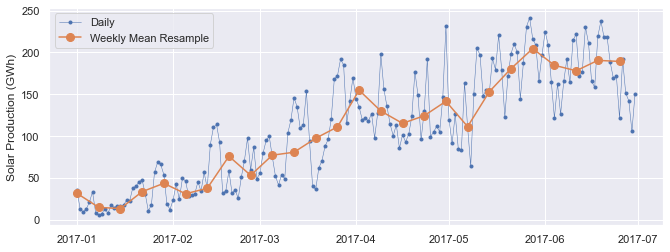

In [40]:
fig, ax = plt.subplots()
ax.plot(opsd_dailyN.loc[start:end, 'Solar'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(opsd_weekly_mean.loc[start:end, 'Solar'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Solar Production (GWh)')
ax.legend()

In [41]:
opsd_monthly = opsd_dailyN[data_columns].resample('M').sum(min_count=28)

In [42]:
opsd_monthly.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-31,45304.704,NaN,NaN,NaN
2006-02-28,41078.993,NaN,NaN,NaN
2006-03-31,43978.124,NaN,NaN,NaN
2006-04-30,38251.767,NaN,NaN,NaN
2006-05-31,38858.143,NaN,NaN,NaN


Text(0, 0.5, 'Monthly Total (GWh)')

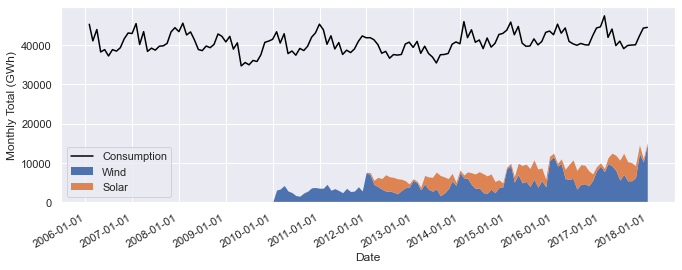

In [43]:
fig, ax = plt.subplots()
ax.plot(opsd_monthly['Consumption'], color='black', label='Consumption')
opsd_monthly[['Wind', 'Solar']].plot.area(ax=ax, linewidth=0)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_ylabel('Monthly Total (GWh)')

In [44]:
opsd_annual = opsd_dailyN[data_columns].resample('A').sum(min_count=360)

In [45]:
opsd_annual = opsd_annual.set_index(opsd_annual.index.year)

In [46]:
opsd_annual.index

Int64Index([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
            2017],
           dtype='int64', name='Date')

In [47]:
opsd_annual.index.name = 'Year'

In [48]:
opsd_annual['Wind+Solar/Consumption'] = opsd_annual['Wind+Solar'] / opsd_annual['Consumption']

In [49]:
opsd_annual.tail(3)

,Consumption,Wind,Solar,Wind+Solar,Wind+Solar/Consumption
Year,,,,,
2015,505264.56300,77468.994,34907.138,112376.132,0.222410
2016,505927.35400,77008.126,34562.824,111570.950,0.220528
2017,504736.36939,102667.365,35882.643,138550.008,0.274500


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '2012'),
  Text(1, 0, '2013'),
  Text(2, 0, '2014'),
  Text(3, 0, '2015'),
  Text(4, 0, '2016'),
  Text(5, 0, '2017')])

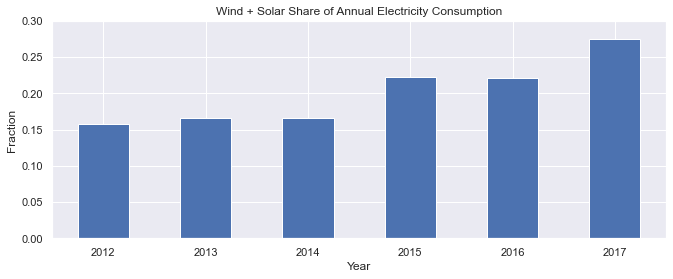

In [50]:
ax = opsd_annual.loc[2012:, 'Wind+Solar/Consumption'].plot.bar(color='C0')
ax.set_ylabel('Fraction')
ax.set_ylim(0, 0.3)
ax.set_title('Wind + Solar Share of Annual Electricity Consumption')
plt.xticks(rotation=0)

In [51]:
opsd_7d = opsd_dailyN[data_columns].rolling(7, center=True).mean()

In [52]:
opsd_7d.head(10)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,1361.471429,NaN,NaN,NaN
2006-01-05,1381.300143,NaN,NaN,NaN
2006-01-06,1402.557571,NaN,NaN,NaN
2006-01-07,1421.754429,NaN,NaN,NaN
2006-01-08,1438.891429,NaN,NaN,NaN
2006-01-09,1449.769857,NaN,NaN,NaN


In [53]:
opsd_7d.head(100)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,1361.471429,NaN,NaN,NaN
2006-01-05,1381.300143,NaN,NaN,NaN
...,...,...,...,...
2006-04-06,1347.883429,NaN,NaN,NaN
2006-04-07,1345.794857,NaN,NaN,NaN
2006-04-08,1343.309429,NaN,NaN,NaN


In [54]:
start, end = '2017-01', '2017-06'

In [55]:
opsd_7d.count()

Consumption    4377
Wind           2902
Solar          2170
Wind+Solar     2163
dtype: int64

In [57]:
opsd_7d.size

17532

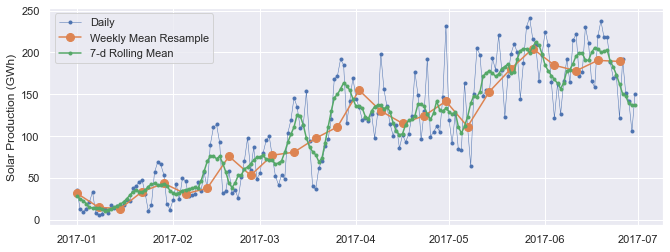

In [58]:
fig, ax = plt.subplots()
ax.plot(opsd_dailyN.loc[start:end, 'Solar'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(opsd_weekly_mean.loc[start:end, 'Solar'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.plot(opsd_7d.loc[start:end, 'Solar'],
marker='.', linestyle='-', label='7-d Rolling Mean')
ax.set_ylabel('Solar Production (GWh)')
ax.legend()

In [59]:
opsd_365d = opsd_dailyN[data_columns].rolling(window=365, center=True, min_periods=360).mean()

Text(0.5, 1.0, 'Trends in Electricity Consumption')

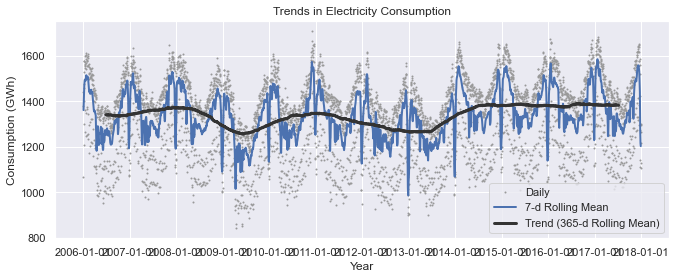

In [60]:
fig, ax = plt.subplots()
ax.plot(opsd_dailyN['Consumption'], marker='.', markersize=2, color='0.6',
linestyle='None', label='Daily')
ax.plot(opsd_7d['Consumption'], linewidth=2, label='7-d Rolling Mean')
ax.plot(opsd_365d['Consumption'], color='0.2', linewidth=3,
label='Trend (365-d Rolling Mean)')
# Set x-ticks to yearly interval and add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Consumption (GWh)')
ax.set_title('Trends in Electricity Consumption')


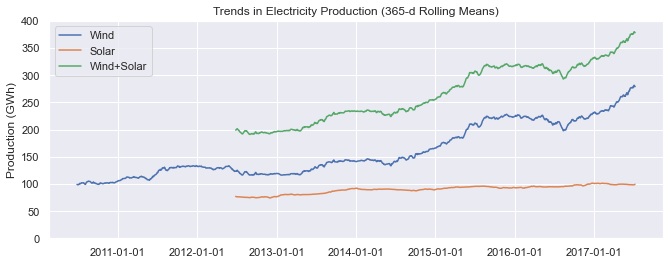

In [61]:
fig, ax = plt.subplots()
for nm in ['Wind', 'Solar', 'Wind+Solar']:
    ax.plot(opsd_365d[nm], label=nm)
    # Set x-ticks to yearly interval, adjust y-axis limits, add legend and labels
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.set_ylim(0, 400)
    ax.legend()
    ax.set_ylabel('Production (GWh)')
    ax.set_title('Trends in Electricity Production (365-d Rolling Means)')